In [13]:
# EJECUTAR ESTA CELDA
# Librerias y Funciones iniciales

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn


def NewtonPol(dat):
    """
    Implementación del interpolador de Newton
    Entradas:
    dat -- lista de puntos (x, y) en el plano

    Salidas:
    F -- tabla de diferencias divididas
    P -- función de interpolación
    """
    n = len(dat)-1
    F = [[0 for x in dat] for x in dat]  # crear tabla nula

    for i, p in enumerate(dat):  # condiciones iniciales
        F[i][0] = p[1]

    for i in range(1, n+1):  # tabla de diferencias divididas
        for j in range(1, i+1):
            F[i][j] = (F[i][j-1]-F[i-1][j-1])/(dat[i][0]-dat[i-j][0])

    def L(k, x):
        """Implementación funciones L_k(x)"""
        # polinomio $L_k(x)=\prod\limits_{i \leq k}(x-x_i)$
        out = 1
        for i, p in enumerate(dat):
            if i <= k:
                out *= (x - p[0])
        return out

    def P(x):
        """Implementación polinomio P(x)"""
        # $P(x)=f[x_0]+\sum_{k=1}^{n}f[x_0,x_1,\ldots,x_k]L_{k-1}(x)$
        newt = 0
        for i in range(1, n+1):
            newt += F[i][i]*L(i-1, x)
        return newt + F[0][0]

    return F, P

def metodo_biseccion(f, a, b, tol=1e-4, num=100, verbose=True):
    if (f(a)*f(b)>=0):
        if verbose:
            print('El método no funciona, error en los intervalos')
        return None
    n = 1
    while n <= num:
        p_i = (a + b)/2
        if verbose:
            print(f'ite:{n}, a:{a:.5f}, b:{b:.5f}, p_{n}:{p_i:.5f}')
        if f(p_i) == 0:
            if verbose:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(b - a)
        if error <= tol:
            if verbose:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

#  Ejercicio 1
Luego que el alcohol es absorbido por el cuerpo, este es metabolizado y desechado gradualmente.

Suponga que usted ha ingerido tres bebidas alcohólicas y que a las diez de la noche (22:00) la concentración de alcohol en la sangre (BAC) es de 0.6 mg/ml. La siguiente tabla muestra la concentración de alcohol desde las diez de la noche (t = 0.0 corresponde a las 22:00H)

\begin{table}
	\Large
	\begin{tabular}{c|c}
		\hline
		$t$ (h)	&	BAC (mg/ml)	\\ \hline
		0.0 &	0.601 \\
		0.5 &	0.429 \\
		1.0 &	0.290 \\
		1.5 &	0.219 \\
		2.0 &	0.142
	\end{tabular}
\end{table}
1. ¿Qué función se ajusta mejor a los datos? (por ejemplo: función lineal, cuadrática,  polinómica de grado superior, trigonométrica, exponencial, logarítmica, potencia, etc)

2. Ulizando el método de mínimos cuadrados encuentre un modelo que determine el nivel de alcohol de la sangre $t$ horas después de las 22:00

3. En la misma gráfica, trace una gráfica de la dispersión de los datos y del modelo encontrado

4. Use el modelo para determinar cuánto tiempo debe pasar desde las 22:00 para poder manejar, suponga que el límite legal es {0.075} mg/ml

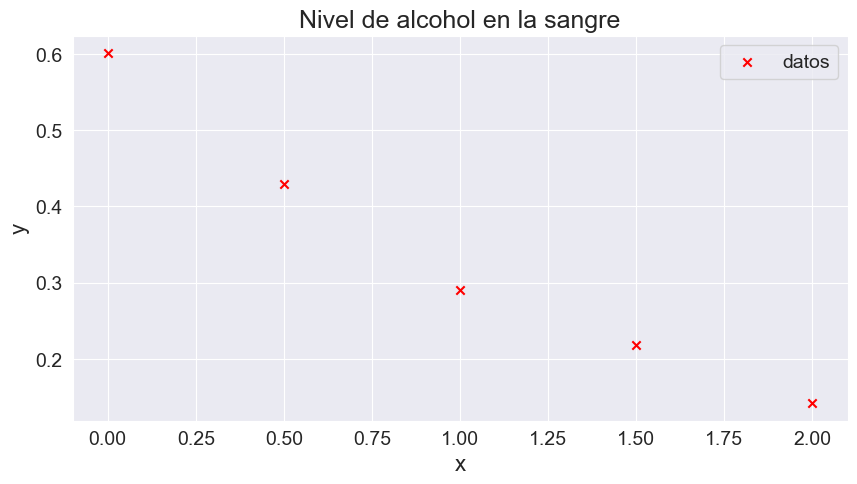

In [9]:
x = np.array([0, 0.5, 1, 1.5, 2])
y = np.array([0.601, 0.429, 0.290, 0.219, 0.142])
# Graficar los puntos
fig, ax = plt.subplots(figsize=(10, 5))
x0 =np.linspace(1, 2, 1000)

# plt.plot(x0, f_2(x0), label='función')
plt.scatter(x, y, label='datos', color='red', marker='x')

ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Nivel de alcohol en la sangre', fontsize=18)
plt.legend(fontsize=14)
plt.show()

La función que mejor se ajusta a los datos es una función exponencia de la forma $y=a_0 e^{a_1 x}$

[-0.71158419 -0.50120478]
0.6058003651612325*e^(x*-0.7115841885958815)


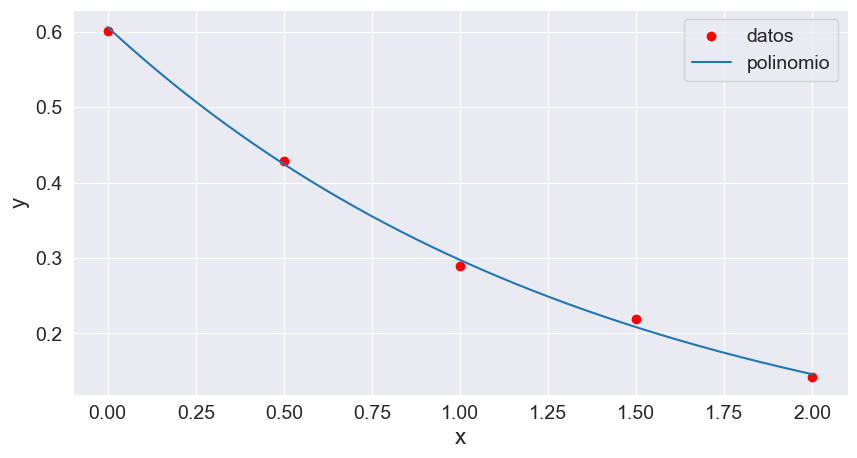

In [12]:
# Realizar la transformación lineal
Y = np.log(y)
# Encontrar los valores de la matriz de coeficientes
sum_x_2 = np.sum(x**2)
sum_x = np.sum(x)
sum_Y = np.sum(Y)
sum_Yx = np.sum(x*Y)

a = np.array([[sum_x_2, sum_x],
              [sum_x, len(x)]])
b = np.array([sum_Yx, sum_Y])
# Solucionar el sistema
p = np.linalg.solve(a, b)
print(p)
a_0, a_1 = np.exp(p[1]), p[0]

f_exponencial = lambda x: a_0*np.exp(x*a_1)
print(f'{a_0}*e^(x*{a_1})')
# Graficar los puntos
fig, ax = plt.subplots(figsize=(10, 5))
x0 =np.linspace(min(x), max(x), 1000)
plt.scatter(x, y, label='datos', color='red')
plt.plot(x0, f_exponencial(x0), label='polinomio')
ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'', fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [19]:
f = lambda x: f_exponencial(x) - 0.075
metodo_biseccion(f, 0, 3)

ite:1, a:0.00000, b:3.00000, p_1:1.50000
ite:2, a:1.50000, b:3.00000, p_2:2.25000
ite:3, a:2.25000, b:3.00000, p_3:2.62500
ite:4, a:2.62500, b:3.00000, p_4:2.81250
ite:5, a:2.81250, b:3.00000, p_5:2.90625
ite:6, a:2.90625, b:3.00000, p_6:2.95312
ite:7, a:2.90625, b:2.95312, p_7:2.92969
ite:8, a:2.92969, b:2.95312, p_8:2.94141
ite:9, a:2.92969, b:2.94141, p_9:2.93555
ite:10, a:2.93555, b:2.94141, p_10:2.93848
ite:11, a:2.93555, b:2.93848, p_11:2.93701
ite:12, a:2.93555, b:2.93701, p_12:2.93628
ite:13, a:2.93555, b:2.93628, p_13:2.93591
ite:14, a:2.93555, b:2.93591, p_14:2.93573
ite:15, a:2.93573, b:2.93591, p_15:2.93582
ite:16, a:2.93573, b:2.93582, p_16:2.93578
Solución aproximada encontrada: 2.9357757568359375
número de iteraciones: 16


2.9357757568359375

# Ejercicio 2
Se tienen los siguientes datos de un experimento:
[(-4.5, -20.625), (-3.5, 14.625), (-2.5, 28.875), (-1.5, 28.125), (-0.5, 18.375), (0.5, 5.625), (1.5, -4.125), (2.5, -4.875), (3.5, 9.375), (4.5, 44.625)]
1. Utilice algún método de interpolación para encontrar el polinomio que interpola todos los datos. ¿Qué grado tiene el polinómio?
2. Con el polinomio de interpolación, encuentre los valores para $x=-4$, $x=1$ y $x=3$
3. Grafique los puntos y el polinomio encontrado en una misma gráfica
4. Encuentre el mejor modelo de regresión (lineal, cuadrático, polinomial, exponencial, potencia) para el experimento.
5.  Con el modelo de regresión, encuentre los valores para $x=-4$, $x=1$ y $x=3$
6. Grafique los puntos, el polinomio de interpolación y el modelo de regresión encontrado en una misma gráfica.


In [29]:
x = np.array([-4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5])
y = np.array([-20.625, 14.625, 28.875, 28.125, 18.375, 5.625, -4.125, -4.875, 9.375, 44.625])
F, P = NewtonPol(list(zip(x,y)))

In [22]:
F

[[-20.625, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [14.625, 35.25, 0, 0, 0, 0, 0, 0, 0, 0],
 [28.875, 14.25, -10.5, 0, 0, 0, 0, 0, 0, 0],
 [28.125, -0.75, -7.5, 1.0, 0, 0, 0, 0, 0, 0],
 [18.375, -9.75, -4.5, 1.0, 0.0, 0, 0, 0, 0, 0],
 [5.625, -12.75, -1.5, 1.0, 0.0, 0.0, 0, 0, 0, 0],
 [-4.125, -9.75, 1.5, 1.0, 0.0, 0.0, 0.0, 0, 0, 0],
 [-4.875, -0.75, 4.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0, 0],
 [9.375, 14.25, 7.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0],
 [44.625, 35.25, 10.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

Polinomio de interpolación:
$-20.625 + 35.25*(x + 4.5) - 10.5*(x + 4.5)*(x + 3.5) + 1*(x + 4.5)*(x + 3.5)*(x*2.5)$

In [31]:
f_interpol = lambda x: -20.625 + 35.25*(x + 4.5) - 10.5*(x + 4.5)*(x + 3.5) + 1*(x + 4.5)*(x + 3.5)*(x + 2.5)

In [32]:
print(f_interpol(-4), P(-4))
print(f_interpol(1), P(1))
print(f_interpol(3), P(3))

0.0 0.0
0.0 0.0
0.0 0.0


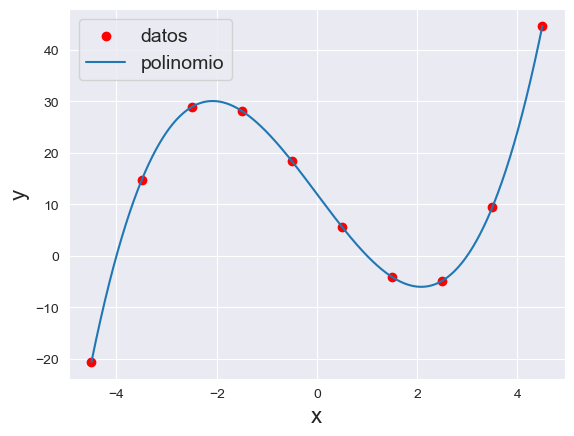

In [33]:
x0 =np.linspace(min(x), max(x), 1000)
plt.scatter(x, y, label='datos', color='red')
plt.plot(x0, f_interpol(x0), label='polinomio')
ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'', fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [34]:
sum_x_6 = np.sum(x**6)
sum_x_5 = np.sum(x**5)
sum_x_4 = np.sum(x**4)
sum_x_3 = np.sum(x**3)
sum_x_2 = np.sum(x**2)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_yx = np.sum(x*y)
sum_yx_2= np.sum(y*x**2)
sum_yx_3= np.sum(y*x**3)
a = np.array([[sum_x_6, sum_x_5, sum_x_4, sum_x_3],
              [sum_x_5, sum_x_4, sum_x_3, sum_x_2],
              [sum_x_4, sum_x_3 , sum_x_2, sum_x],
              [sum_x_3 , sum_x_2, sum_x, len(x)]])
b = np.array([sum_yx_3, sum_yx_2, sum_yx, sum_y])
q = np.linalg.solve(a, b)
print(q)
f_cubic = lambda x: q[0]*x**3 + q[1]*x**2 + q[2]*x + q[3]

[  1.   0. -13.  12.]


Regresión cúbica:
$fcubic(x) = x^3 - 13 x^2 + 12$

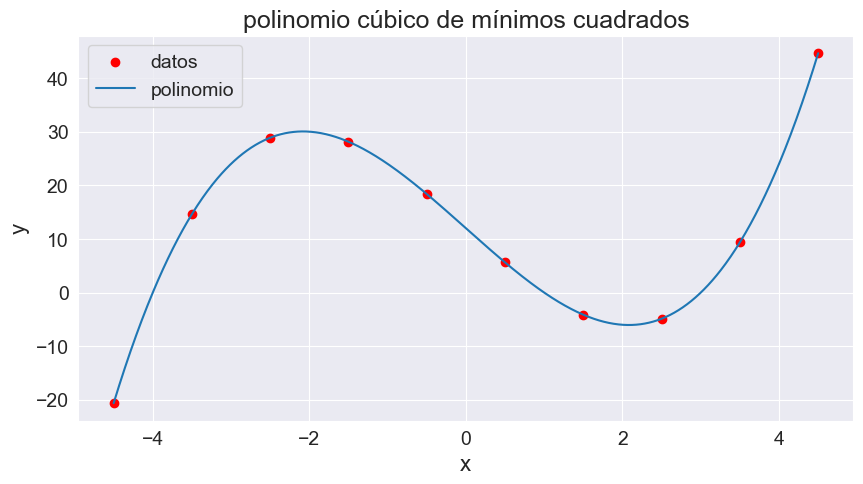

In [36]:
# Graficar los puntos
fig, ax = plt.subplots(figsize=(10, 5))
x0 =np.linspace(min(x), max(x), 1000)
plt.scatter(x, y, label='datos', color='red')
plt.plot(x0, f_cubic(x0), label='polinomio')
ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'polinomio cúbico de mínimos cuadrados', fontsize=18)
plt.legend(fontsize=14)
plt.show()